## Gradient Descent

Gradient Descent is the most basic but most used optimization algorithm. It’s used heavily in linear regression and classification algorithms. It is an iterative optimisation algorithm to find the minimum of a function or find the coefficients (or weights or parameters) for which the cost/loss function is minimum.

A gradient measure how much the output of a function changes if you change the inputs a little bit. You can also think of a gradient as the slope of a function. The concept of slope is used to measure the rate at which changes are taking place. The higher the gradient, the steeper the slope and the faster a model can learn. But if the slope is zero, the model stops learning. Said it more mathematically, a gradient is a partial derivative with respect to its inputs.

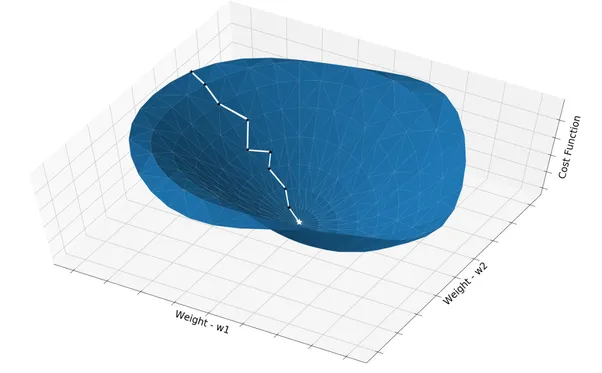


Lets take an example of Linear classifer

- First take the dot product between a fixed weight vector w and the identity feature vector φ(x). Then take the sign of the dot product.
- The sign of a number z is +1 if z > 0 and −1 if z < 0 and 0 if z = 0.
- Let’s now visualize what f does. First, we can plot w either as a point or as a vector from the origin to that point; the latter will be most useful for our purposes.

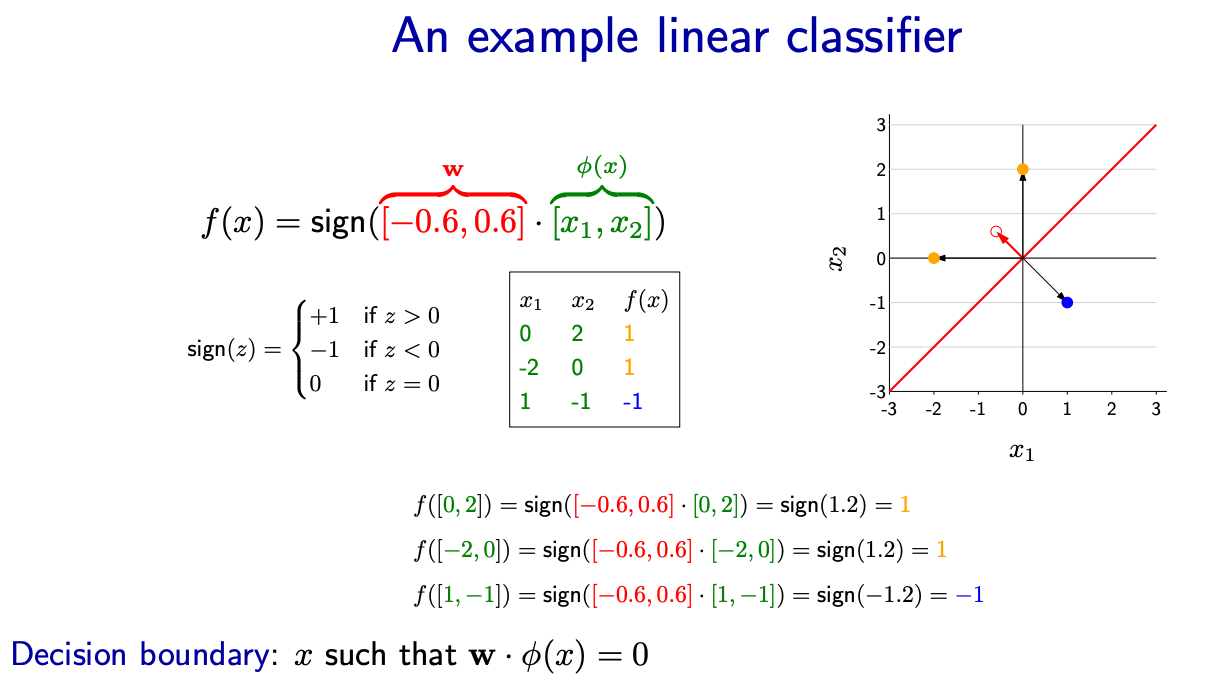

### Gradient of Hinge Loss

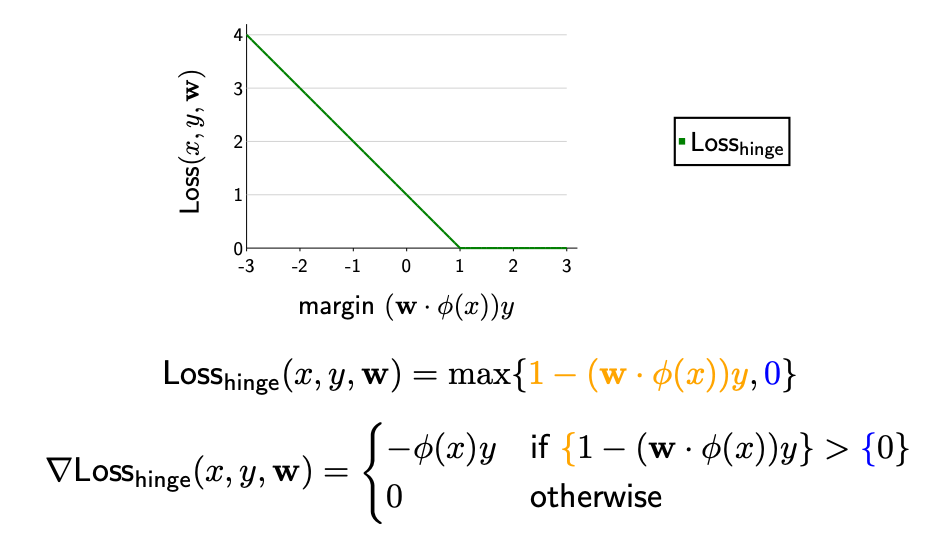

Given
- $f_w(x) = w.X$
- $w = [0.5, 1]$
- $X = φ(x) = [x1, x2]$

1) **Incorrect classification:** When the margin is less than `1`, then the gradient is the gradient of `1−(w · X)y`, which is equal to `−X.y`. This means the prediction is incorrect and is inside the margin.
$$ 
∇Loss_h(x_i, y_i, w) = −X_i * y_i \\ 
if \space (w · X_i + b) * y_i < {1} \\
OR \space \{1 - (w · X_i + b) * y_i\} > {0} \\
$$ 

For misclassifed data poitns, the weight `w` and bias `b` is adjust as follows

- $w = w - alpha * (-y_i * X_i)$
- $b = b - alpha * (-y_i)$

2) **Correct classification:** If the margin is larger than `1`, then the gradient is the gradient of `0`, which is `0`. This means the the prediction is correct and is outside the margin. In this case the weight `w` and bias `b` remains unchaniged

$$ 
∇Loss_h(x_i, y_i, w) = 0 \\ if \space (w · X_i + b) * y_i >= {1}
$$ 

3) Notice when the margin is exactly `1` i.e. the prediction is on the margin, the gradient doesn’t exist because the hinge loss is not differentiable there. But in practice, we can take either $−X_i * y_i$ or $0$

`alpha` which is also known as learning rate, is a hyperparameter that you must set before training the model. There's no definitive guide to choosing its value, but a common starting point is `0.01` or `0.001`. The learning rate determines how big the steps are during the gradient descent. If it's too large, the model might overshoot the minimum and fail to converge. If it's too small, the model might need too many iterations to converge, which can be computationally expensive.

In simple implementations of gradient descent, the learning rate is kept constant throughout the training process. However, in more advanced implementations, the learning rate can be changed during the training process to help the model converge more quickly. This is known as learning rate scheduling.

In [1]:
import numpy as np

def svm_gradient_descent(X, y, w, b, alpha, num_iters):
    m = len(y)  # number of training examples

    for _ in range(num_iters):
        for j in range(m):
            if y[j] * (np.dot(w, X[j]) + b) >= 1:  # correctly classified outside the margin
                w_grad = 0
                b_grad = 0
            else:  # incorrectly classified or inside the margin
                w_grad = -y[j] * X[j]
                b_grad = -y[j]

            w = w - alpha * w_grad
            b = b - alpha * b_grad

    return w, b

# Example usage:
X = np.array([[1, 1], [2, 3], [3, 5], [1, -1], [2, -2], [3, -4]])  # feature matrix
y = np.array([1, 1, 1, -1, -1, -1])  # target vector
w = np.array([0.0, 0.0])  # initial weights
b = 0.0  # initial bias
alpha = 0.01  # learning rate
num_iters = 1000  # number of iterations

w, b = svm_gradient_descent(X, y, w, b, alpha, num_iters)
print(f"Final Weight: {w}, Bias: {b}")  # Should be close to the optimal weights and bias

Final Weight: [-0.02  1.01], Bias: 0.019999999999999997


## Perceptron Learning vs Gradient Descent Learning

The perceptron learning rule and gradient descent learning rule are two fundamental algorithms used in machine learning for training neural networks. Here's a comparison of the two:

### Perceptron Learning:
- The perceptron learning rule is a simple algorithm used for training a single-layer neural network, specifically a single-layer perceptron.
- It is used for binary classification tasks where the data is linearly separable.
- The perceptron learning rule updates the weights of the perceptron based on the error in the prediction, moving the decision boundary towards the correct classification.
- It is a type of supervised learning algorithm that learns by adjusting the weights based on misclassifications.
- The perceptron learning rule is a type of online learning algorithm, meaning it updates the weights after each training example.

### Gradient Descent:
- Gradient descent is a more general optimization algorithm used for training neural networks with multiple layers (deep learning).
- It is based on the gradient of a loss function with respect to the model parameters (weights and biases).
- Gradient descent aims to minimize the loss function by iteratively updating the weights in the direction opposite to the gradient.
- There are different variants of gradient descent, such as stochastic gradient descent (SGD), mini-batch gradient descent, and Adam, each with its own characteristics and advantages.

### Handling Non-linearly Separable Data:
- When dealing with non-linearly separable data, a single-layer perceptron (with or without threshold units) is not capable of learning a decision boundary to separate the classes.
- However, by using multiple layers of artificial neurons, as in a multilayer perceptron (MLP) or a deep neural network, it is possible to learn complex decision boundaries that can separate non-linearly separable data.
- The addition of hidden layers with nonlinear activation functions (such as ReLU, sigmoid, or tanh) allows neural networks to learn and approximate complex, nonlinear relationships in the data.
- By using backpropagation with gradient descent (or its variants) for training deep neural networks, we can adjust the weights and biases of the network to minimize the loss function and improve the model's performance on non-linearly separable data.

In conclusion, while the perceptron learning rule is limited to linearly separable data and single-layer networks, gradient descent with multiple layers of artificial neurons can handle non-linearly separable data by learning complex decision boundaries.

#### References
- [ONE](https://stanford-cs221.github.io/autumn2023-extra/modules/machine-learning/linear-classification.pdf)
- [TWO](https://stanford-cs221.github.io/spring2024-extra/modules/machine-learning/learning1.pdf)
- [THREE](https://courses.engr.illinois.edu/cs446/sp2015/Slides/Lecture04.pdf)
